In [98]:
import pandas as pd


In [99]:
train=pd.read_csv('/content/drive/MyDrive/finalproject/drugsComTrain_raw.csv')
test=pd.read_csv('/content/drive/MyDrive/finalproject/drugsComTest_raw.csv')


In [100]:
train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [101]:
test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [102]:
train.shape

(161297, 7)

In [103]:
test.shape

(53766, 7)

In [104]:
df =pd.concat([train, test])


In [105]:
df.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1


In [106]:
df.shape

(215063, 7)

Here , I am creating a new column sentiment based on the rating given

In [107]:
def sentiment(x):
  if x>=6:
    return 'positive'
  elif x==5:
    return 'neutral'
  else:
    return 'negative'


In [110]:
df['sentiment']=df['rating'].apply(lambda x: sentiment(x))
train['sentiment']=train['rating'].apply(lambda x: sentiment(x))
test['sentiment']=train['rating'].apply(lambda x: sentiment(x))

In [111]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,sentiment
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,positive
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,positive
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,neutral
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,positive
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,positive


# Some Exploratory Data Analysis

In [112]:
df.condition.value_counts().head(20)

Birth Control                38436
Depression                   12164
Pain                          8245
Anxiety                       7812
Acne                          7435
Bipolar Disorde               5604
Insomnia                      4904
Weight Loss                   4857
Obesity                       4757
ADHD                          4509
Diabetes, Type 2              3362
Emergency Contraception       3290
High Blood Pressure           3104
Vaginal Yeast Infection       3085
Abnormal Uterine Bleeding     2744
Bowel Preparation             2498
Smoking Cessation             2440
ibromyalgia                   2370
Migraine                      2277
Anxiety and Stress            2236
Name: condition, dtype: int64

Text(0.5, 1.0, 'Top 10 drugs')

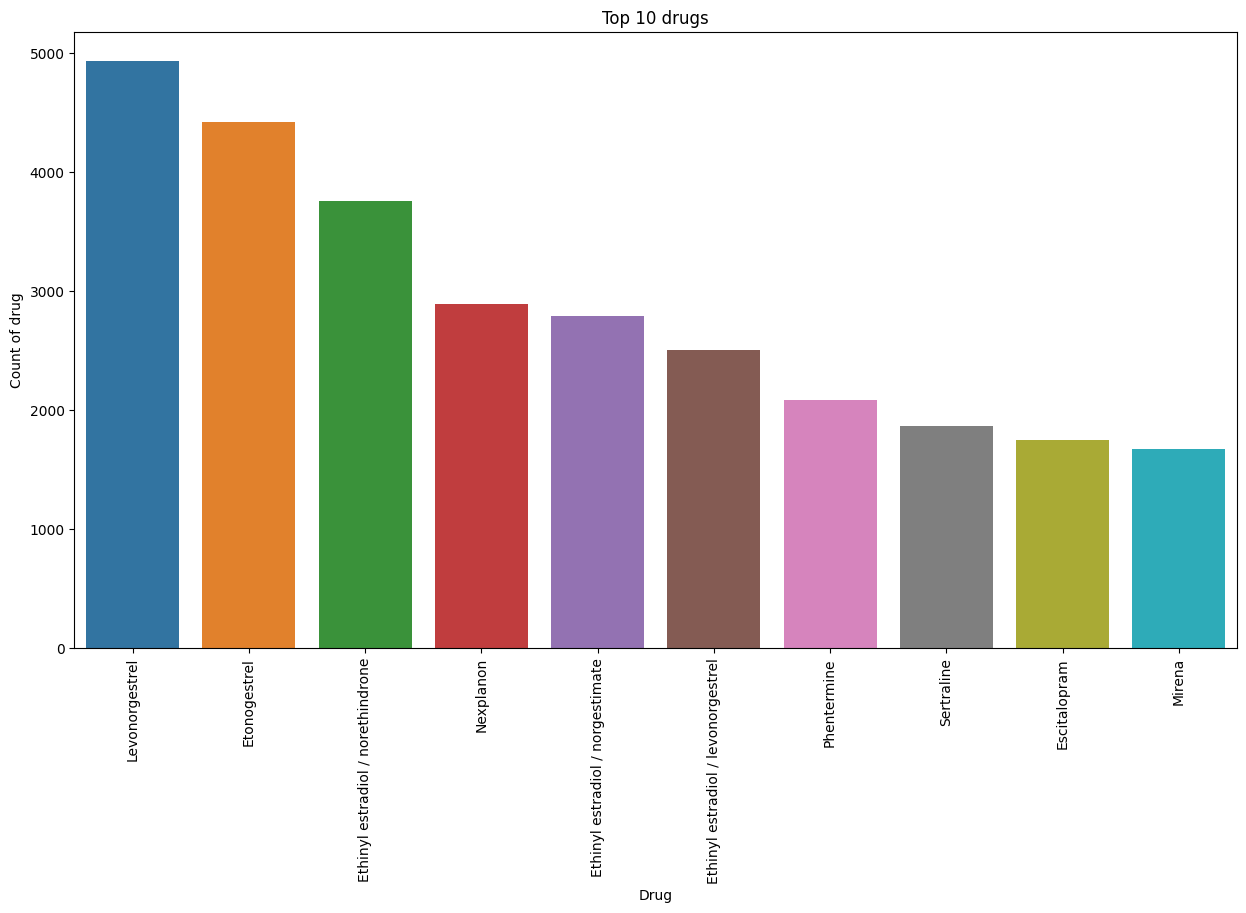

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
drugs=df['drugName'].value_counts()
plt.figure(figsize=(15,8))
sns.barplot(x=drugs[:10].index, y=drugs[:10])
plt.xlabel("Drug")
plt.xticks(rotation='vertical')
plt.ylabel("Count of drug")
plt.title("Top 10 drugs")

Text(0.5, 1.0, 'Top 10 conditions')

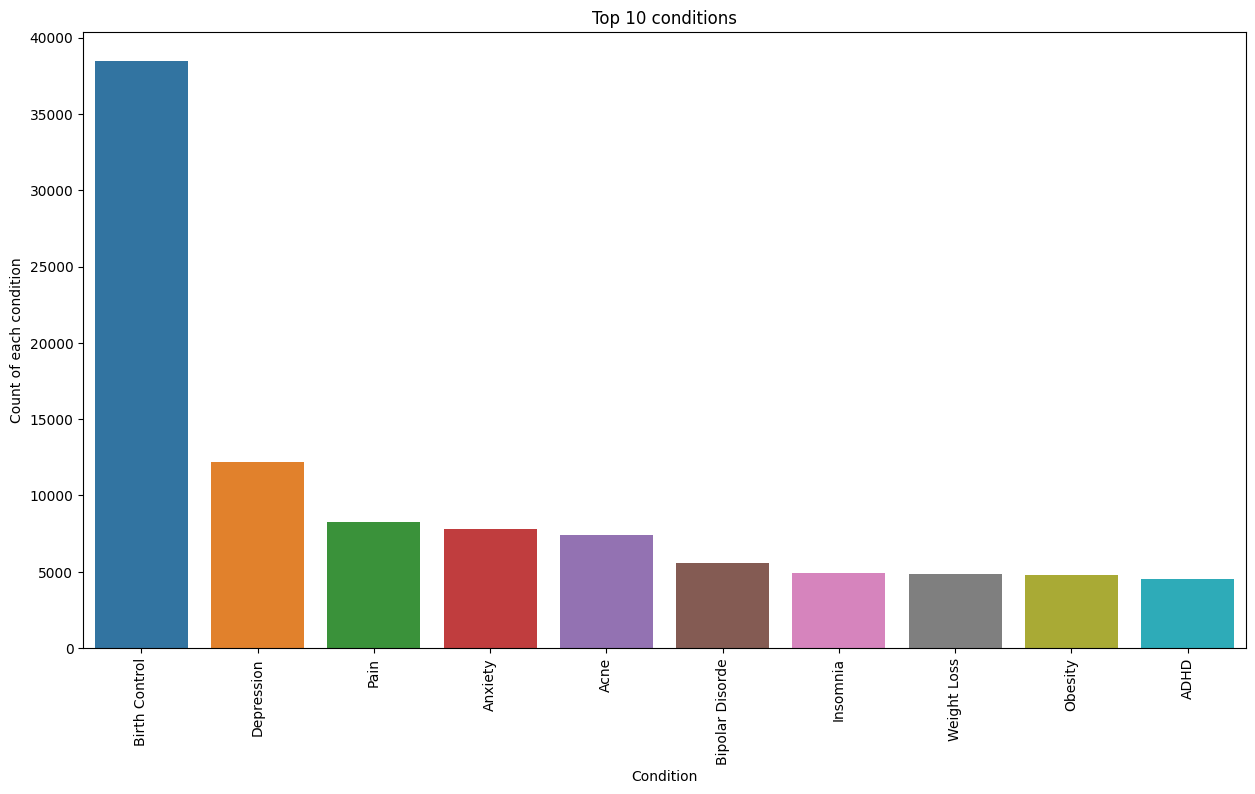

In [114]:
top_conditions=df['condition'].value_counts()
plt.figure(figsize=(15,8))
sns.barplot(x=top_conditions[:10].index, y=top_conditions[:10])
plt.xlabel("Condition")
plt.xticks(rotation='vertical')
plt.ylabel("Count of each condition")
plt.title("Top 10 conditions")

here I am analyzing word clouds for top conditions

In [115]:
grouped_df = df.groupby('condition')
birth_control_df = grouped_df.get_group('Birth Control')
depression_df=grouped_df.get_group('Depression')
pain_df=grouped_df.get_group('Pain')

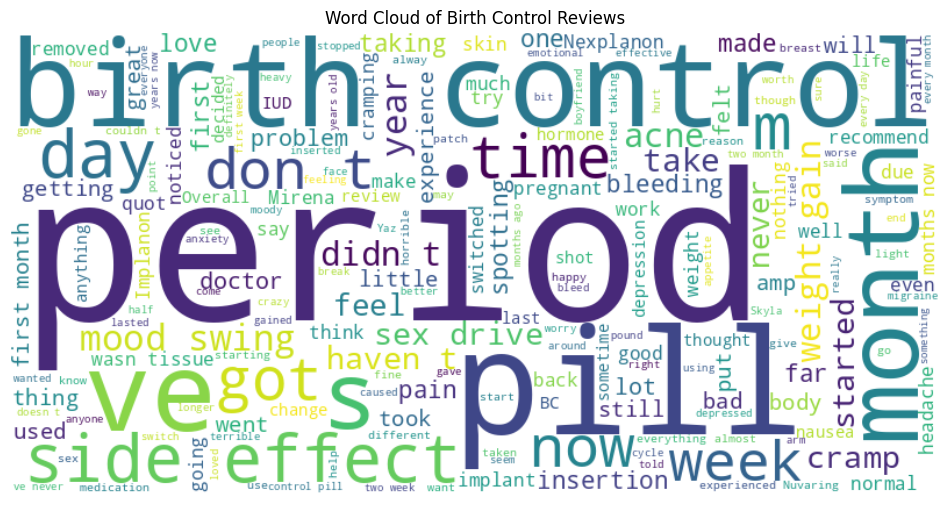

In [116]:
from wordcloud import WordCloud
reviews_text = ' '.join(birth_control_df['review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews_text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Birth Control Reviews')
plt.show()

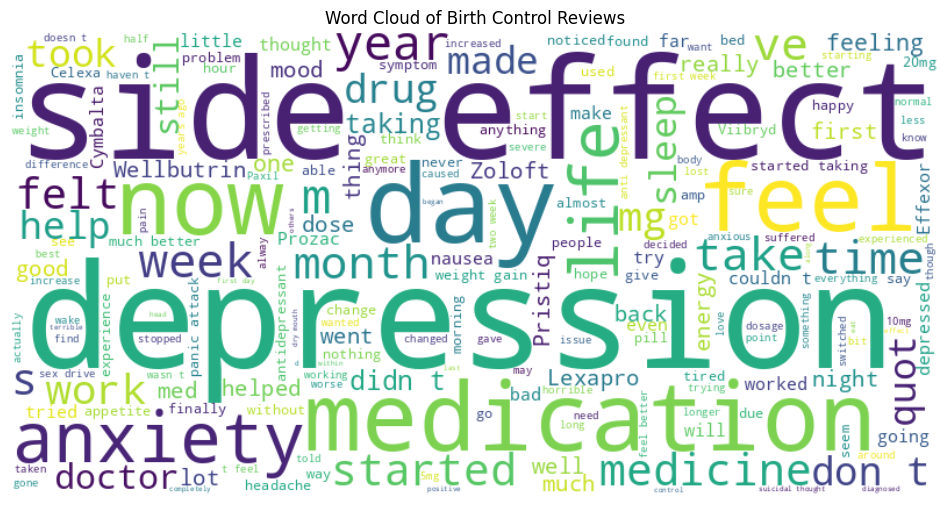

In [117]:
from wordcloud import WordCloud
reviews_text = ' '.join(depression_df['review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews_text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Birth Control Reviews')
plt.show()

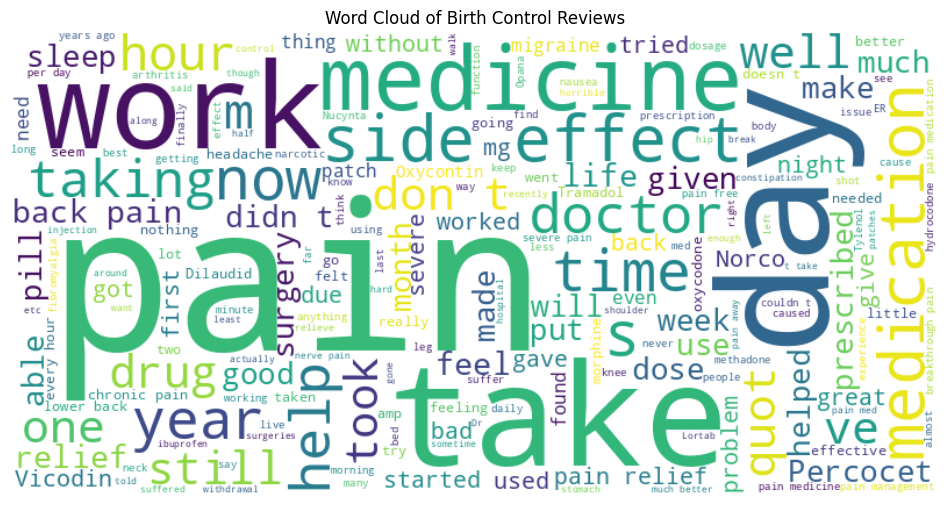

In [19]:
from wordcloud import WordCloud
reviews_text = ' '.join(pain_df['review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews_text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Birth Control Reviews')
plt.show()

In [118]:
df.groupby('sentiment').size()

sentiment
negative     53572
neutral      10723
positive    150768
dtype: int64

In [119]:

# Calculate the percentage of each sentiment category
sentiment_counts = df['sentiment'].value_counts()
percentages = sentiment_counts / len(df) * 100




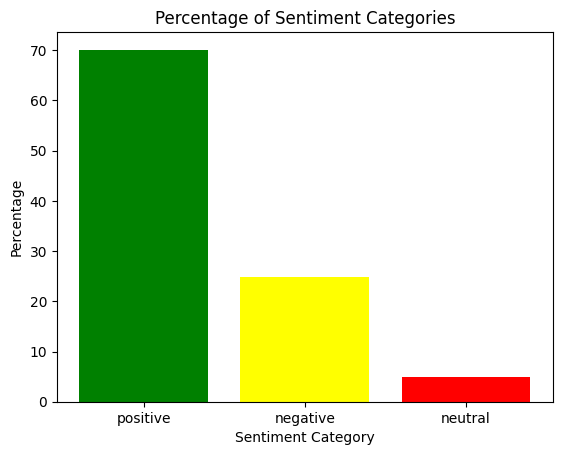

In [120]:
import matplotlib.pyplot as plt
# Create a bar plot
fig, ax = plt.subplots()
ax.bar(percentages.index, percentages.values, color=['green', 'yellow', 'red'])
ax.set_xlabel('Sentiment Category')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Sentiment Categories')
plt.show()


# Preprocessing Data

In [121]:
!pip install tokenizer


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [124]:
pip install cytoolz


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [125]:
pip install tqdm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [126]:
import re

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
from collections import Counter, defaultdict
from cytoolz import *
from nltk.tokenize import MWETokenizer
from tqdm.auto import tqdm

tqdm.pandas()


In [127]:
import spacy
from tqdm.auto import tqdm
nlp = spacy.load(
    "en_core_web_sm",
    exclude=["tagger","parser","ner","lemmatizer","attribute_ruler"],
)

In [128]:
def tokenize(text):
  doc=nlp.tokenizer(text)
  return [t.norm_ for t in doc if t.is_alpha]

In [ ]:


train['tokens']=train["review"].apply(tokenize)
test['tokens']=test["review"].apply(tokenize)

In [130]:
train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,sentiment,tokens
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,positive,"[it, has, no, side, effect, i, take, it, in, c..."
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,positive,"[my, son, is, halfway, through, his, fourth, w..."
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,neutral,"[i, used, to, take, another, oral, contracepti..."
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,positive,"[this, is, my, first, time, using, any, form, ..."
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,positive,"[suboxone, has, completely, turned, my, life, ..."


In [131]:
from pandas.io.formats.format import TextAdjustment
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def tokenize(text):
    # Tokenize the text and remove stop words
    words = [t.norm_ for t in nlp(text) if t.is_alpha and not t.is_stop]
    return words

# Create a list of stop words
stop_words = set(stopwords.words('english'))

# Remove stop words from the existing "tokens" column
train['tokens'] = train['tokens'].apply(lambda x: [word for word in x if word not in stop_words])
test['tokens'] = test['tokens'].apply(lambda x: [word for word in x if word not in stop_words])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [132]:
from collections import Counter

# Concatenate all the lists of tokens into a single list
all_tokens = []
for tokens in train['tokens']:
    all_tokens.extend(tokens)

# Create a Counter object from the list of tokens
counter = Counter(all_tokens)

# Get the top 10 words and their frequencies
top_words = counter.most_common(10)

# Print the top 10 words and their frequencies
for word, frequency in top_words:
    print(f"{word}: {frequency}")


day: 57533
side: 53497
taking: 51294
years: 46667
pain: 45552
effects: 45064
first: 45023
mg: 44049
take: 43923
months: 42697


In [133]:
# Drop rows with missing values
train.dropna(inplace=True)
test.dropna(inplace=True)


## Topic Modelling

In [134]:
!pip install tomotopy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
import tomotopy as tp


In [36]:
k = 50
min_df = 100
rm_top = 100
tw = tp.TermWeight.ONE
alpha = 0.1
eta = 0.01
tol = 1e-4

In [39]:
%%time

mdl = tp.LDAModel(k=k, min_df=min_df, rm_top=rm_top, tw=tw, alpha=alpha, eta=eta)

for doc in train["tokens"]:
    if doc:
        mdl.add_doc(doc)

mdl.train(0)
last = mdl.ll_per_word
print(f"{0:5d} LL = {last:8.4f}", flush=True)

for i in range(50, 5000, 50):
    mdl.train(50, workers=4)
    ll = mdl.ll_per_word
    print(f"{i:5d} LL = {ll:8.4f}", flush=True)
    if ll - last < tol:
        break
    else:
        last = ll

print(f"Done!")

    0 LL = -12.2514
   50 LL =  -8.2253
  100 LL =  -8.0447
  150 LL =  -7.9835
  200 LL =  -7.9472
  250 LL =  -7.9286
  300 LL =  -7.9166
  350 LL =  -7.9091
  400 LL =  -7.9028
  450 LL =  -7.8982
  500 LL =  -7.8941
  550 LL =  -7.8890
  600 LL =  -7.8860
  650 LL =  -7.8823
  700 LL =  -7.8817
  750 LL =  -7.8806
  800 LL =  -7.8801
  850 LL =  -7.8794
  900 LL =  -7.8781
  950 LL =  -7.8780
Done!
CPU times: user 29min 29s, sys: 7.53 s, total: 29min 37s
Wall time: 17min 42s


In [40]:
", ".join(mdl.removed_top_words)


'day, side, taking, years, pain, effects, first, mg, take, months, started, like, get, days, time, feel, would, back, pill, one, weeks, week, also, took, period, medication, doctor, weight, got, month, since, life, still, bad, anxiety, really, much, never, went, better, medicine, two, work, felt, well, every, control, good, year, even, great, night, go, sleep, ago, tried, works, acne, birth, going, made, drug, depression, little, last, hours, dose, prescribed, worked, used, could, almost, severe, getting, put, help, feeling, use, far, ever, mood, skin, amp, nothing, away, nausea, periods, stopped, lot, sex, times, try, using, bleeding, cramps, symptoms, know, think, experience, helped'

In [41]:
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.manifold import MDS, TSNE


def plot_topics(mdl, method="tsne", figsize=7):

    fig = plt.figure(figsize=(figsize, figsize))

    # x, y coords
    term_topics_dist = np.stack([mdl.get_topic_word_dist(k) for k in range(mdl.k)])
    if method == "mds":
        dist = distance.squareform(distance.pdist(term_topics_dist, "jensenshannon"))
        coords = MDS(2, dissimilarity="precomputed").fit_transform(dist)
    elif method == "tsne":
        if mdl.k <= 20:
            p = mdl.k - 1
        else:
            p = 20
        coords = TSNE(
            2,
            metric=distance.jensenshannon,
            perplexity=p,
            init="pca",
            learning_rate="auto",
            n_jobs=-1,
        ).fit_transform(term_topics_dist)
    else:
        raise ValueError(f"Method {method} unknown")

    # size of the circle
    doc_topic_dists = np.stack([doc.get_topic_dist() for doc in mdl.docs])
    doc_lengths = np.array([len(doc.words) for doc in mdl.docs])
    words_per_topic = np.dot(doc_topic_dists.T, doc_lengths)
    topic_percent = words_per_topic / words_per_topic.sum()
    sizes = topic_percent * (figsize * fig.dpi) * (figsize * fig.dpi) * (0.25 / 3.14)

    # draw it
    plt.scatter(coords[:, 0], coords[:, 1], s=sizes, alpha=0.3)
    for i in range(mdl.k):
        plt.text(coords[i, 0], coords[i, 1], i, ha="center", va="center")

        plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

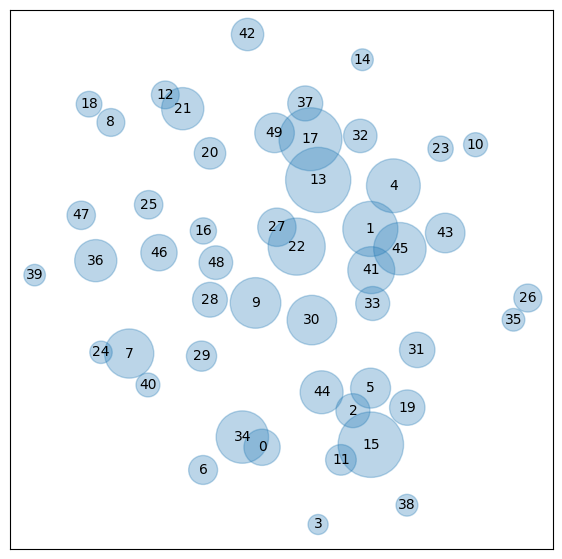

In [42]:
plot_topics(mdl)


In [43]:
topic_words = [[x for x, _ in mdl.get_topic_words(i)] for i in range(mdl.k)]
topics = pd.DataFrame(
    {
        "label": [x[0].upper() for x in topic_words],
        "words": [", ".join(x) for x in topic_words],
    }
)
topics.to_csv("labels.csv", index=False)

In [44]:
topics


,label,words
0,GAINED,"gained, pounds, gain, lost, lbs, lose, exercis..."
1,PEOPLE,"people, long, many, please, make, say, need, s..."
2,NEXPLANON,"nexplanon, implant, implanon, spotting, love, ..."
3,PATCH,"patch, seizures, seizure, patches, keppra, rol..."
4,OLD,"old, without, thank, able, changed, god, final..."
5,PREGNANT,"pregnant, removed, nexplanon, swings, gained, ..."
6,BLOOD,"blood, sugar, levels, metformin, low, victoza,..."
7,FACE,"face, clear, dry, dermatologist, worse, pimple..."
8,PSORIASIS,"psoriasis, arthritis, humira, enbrel, hands, m..."
9,MORNING,"morning, sick, woke, stomach, bed, vomiting, n..."


# Classifiers

In [135]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [136]:
train, test = train_test_split(
    df, test_size=0.1, stratify=df["sentiment"], random_state=619
)

In [137]:
dummy = DummyClassifier()
dummy.fit(train["review"], train["sentiment"])
print(accuracy_score(test["sentiment"], dummy.predict(test["review"])))

0.7010275724182824


# Patient Condition Classification based on Drug Reviews

In [139]:
df_train = df[(df['condition']=='Birth Control') | (df['condition']=='Depression') | (df['condition']=='High Blood Pressure')|(df['condition']=='Diabetes, Type 2')|(df['condition']=='Weight Loss') ]


In [140]:
df.shape


(215063, 8)

In [141]:
df_train.shape


(61923, 8)

In [51]:
X = df_train.drop(['uniqueID','drugName','rating','date','usefulCount'],axis=1)


In [142]:
X.head()

,condition,review,sentiment,review_clean
2,Birth Control,"""I used to take another oral contraceptive, wh...",neutral,used take another oral contraceptive pill cycl...
3,Birth Control,"""This is my first time using any form of birth...",positive,first time using form birth control glad went ...
9,Birth Control,"""I had been on the pill for many years. When m...",positive,pill many year doctor changed rx chateal effec...
11,Depression,"""I have taken anti-depressants for years, with...",positive,taken anti depressant year improvement mostly ...
14,Birth Control,"""Started Nexplanon 2 months ago because I have...",negative,started nexplanon month ago minimal amount con...


In [143]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [144]:
from nltk.corpus import stopwords

stop = stopwords.words('english')

In [145]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

porter = PorterStemmer()

lemmatizer = WordNetLemmatizer()


In [146]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [147]:
from bs4 import BeautifulSoup
import re

In [148]:
def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stop]
    # 6. lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))

In [149]:
X['review_clean'] = X['review'].apply(review_to_words)

<ipython-input-148-96d5791fc591>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()


In [150]:
X.head()


,condition,review,sentiment,review_clean
2,Birth Control,"""I used to take another oral contraceptive, wh...",neutral,used take another oral contraceptive pill cycl...
3,Birth Control,"""This is my first time using any form of birth...",positive,first time using form birth control glad went ...
9,Birth Control,"""I had been on the pill for many years. When m...",positive,pill many year doctor changed rx chateal effec...
11,Depression,"""I have taken anti-depressants for years, with...",positive,taken anti depressant year improvement mostly ...
14,Birth Control,"""Started Nexplanon 2 months ago because I have...",negative,started nexplanon month ago minimal amount con...


In [151]:
X_feat=X['review_clean']
y=X['condition']

In [152]:
from sklearn.model_selection import train_test_split


In [153]:
X_train, X_test, y_train, y_test = train_test_split(X_feat, y,stratify=y,test_size=0.2, random_state=0)


In [154]:
import pandas as pd # data preprocessing
import itertools # confusion matrix
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
# To show all the rows of pandas dataframe
pd.set_option('display.max_rows', None)

In [155]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [156]:
count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

accuracy:   0.961
Confusion matrix, without normalization


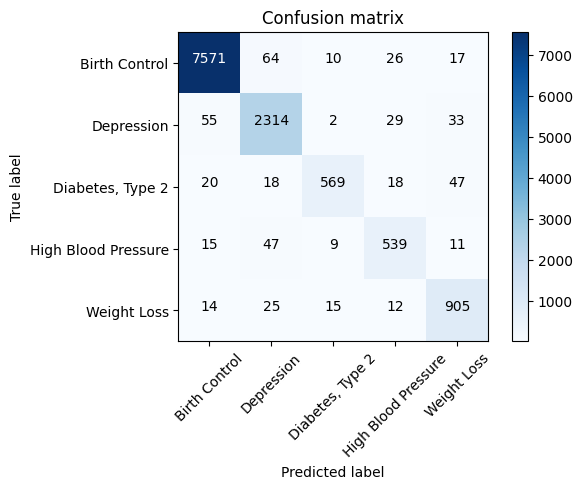

In [157]:
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure','Weight Loss'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure','Weight Loss'])

In [158]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

accuracy:   0.912
Confusion matrix, without normalization


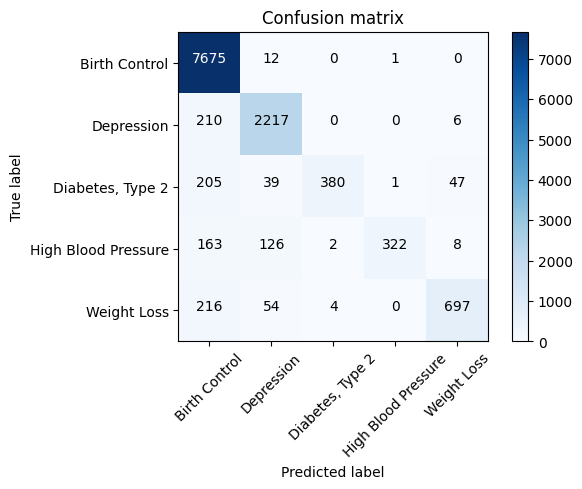

In [159]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)
pred = mnb_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure','Weight Loss'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure','Weight Loss'])

In [160]:
text =["I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations."]
test1 = tfidf_vectorizer.transform(text)
pred1=mnb_tf.predict(test1)[0]
pred1


'High Blood Pressure'

In [161]:
text =["Started Nexplanon 2 months ago because I have a minimal amount of contraception&#039;s I can take due to my inability to take the hormone that is used in most birth controls. I&#039;m trying to give it time because it is one of my only options right now. But honestly if I had options I&#039;d get it removed. I&#039;ve never had acne problems in my life, and immediately broke out after getting it implanted. Sex drive is completely gone, and I used to have sex with my boyfriend a few days a week, now its completely forced and not even fun for me anymore. I mean I&#039;m on birth control because I like having sex but don&#039;t want to get pregnant, why take a birth control that takes away sex? Very unhappy and hope that I get it back with time or I&#039;m getting it removed."]
test3 = tfidf_vectorizer.transform(text)
pred1=mnb_tf.predict(test3)[0]
pred1

'Birth Control'

# Sentimental Analysis on Drug Reviews

In [162]:
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [163]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [164]:
df.sentiment.value_counts()

positive    150768
negative     53572
neutral      10723
Name: sentiment, dtype: int64

In [165]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(review):
    score = analyzer.polarity_scores(str(review))
    return score["compound"]


train["vader"] = train["review"].progress_apply(get_sentiment)
test["vader"] = test["review"].progress_apply(get_sentiment)

  0%|          | 0/193556 [00:00<?, ?it/s]

  0%|          | 0/21507 [00:00<?, ?it/s]

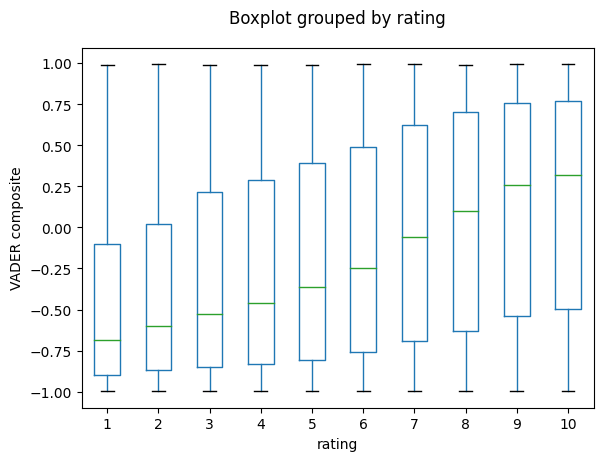

In [166]:
train.boxplot("vader", by="rating", grid=False, showfliers=False)
plt.ylabel("VADER composite")
plt.title("")
plt.show()

In [167]:
theta = np.linspace(-1.0, 1.0, 50)
compound = [
    accuracy_score((train["vader"] > t), (train["sentiment"] == "positive")) for t in theta
]

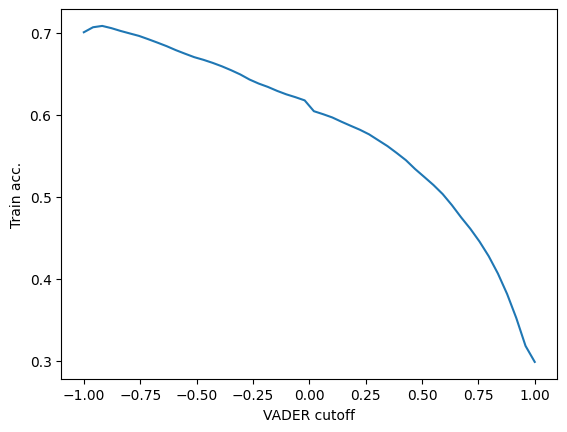

In [168]:
plt.plot(theta, compound)
plt.xlabel("VADER cutoff")
plt.ylabel("Train acc.")
plt.show()

In [169]:
theta[np.argmax(compound)]

-0.9183673469387755

In [170]:
thresh = _
accuracy_score((test["vader"] > thresh), (test["sentiment"] == "positive"))

0.7099548984051705

In [171]:
train[(train["vader"] > 0.9) & (train["sentiment"] == "negative")]["review"].iloc[0]

'"I&#039;ve only been on this pill for a week.  All I have to say is I don&#039;t like it.  This is my first birth control.  It gives me extreme headaches.  The headaches are all day too. Not just for a few hours.  I have migraines anyway, but this is just pushing it over.  I&#039;m hungry a lot and just mellow.  I&#039;ve gained 5 lbs already. I cry and don&#039;t feel good enough to do anything.  I get super tired. I feel like my stomach is messed up all the time.  It gurgles and cramps.  Right under my left rib is the main part it hurts.  It&#039;s like I have gas but can&#039;t ever burp or fart. And when I do, it doesn&#039;t help anything.  I really don&#039;t like what it&#039;s dong to me. And it being my first BC, it really throws the others under the bus."'

In [172]:
analyzer.polarity_scores(_)

{'neg': 0.092, 'neu': 0.74, 'pos': 0.168, 'compound': 0.9081}

In [173]:
train["sentiments"] = train["review"].apply(lambda x: analyzer.polarity_scores(x))
train = pd.concat([train.drop(['sentiments'], axis=1), train['sentiments'].apply(pd.Series)], axis=1)


In [174]:
train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,sentiment,vader,neg,neu,pos,compound
18419,114904,Diazepam,Anxiety,"""I try and avoid taking valium and only use it...",10,14-Jan-17,64,positive,-0.9201,0.193,0.730,0.077,-0.9201
10480,223017,Topamax,Bipolar Disorde,"""Took away my desire to over-drink too much co...",9,5-Sep-08,40,positive,0.4019,0.000,0.816,0.184,0.4019
39398,70313,Zofran,Nausea/Vomiting,"""I use ondansetron orally disintegrating table...",9,25-Nov-15,23,positive,-0.9543,0.157,0.807,0.036,-0.9543
112241,23534,Methadone,Opiate Withdrawal,"""While methadone/methadose does do it&#039;s j...",9,26-Jul-09,74,positive,0.0401,0.041,0.868,0.092,0.0401
2616,201208,Zoloft,Postpartum Depression,"""It took a few weeks, but I feel so much bette...",9,25-Aug-16,30,positive,0.9206,0.135,0.657,0.207,0.9206


In [175]:
def get_diff(text):
    scores = analyzer.polarity_scores(text)
    return scores["pos"] - scores["neg"]


train["vader_diff"] = train["review"].progress_apply(get_diff)
test["vader_diff"] = test["review"].progress_apply(get_diff)

  0%|          | 0/193556 [00:00<?, ?it/s]

  0%|          | 0/21507 [00:00<?, ?it/s]

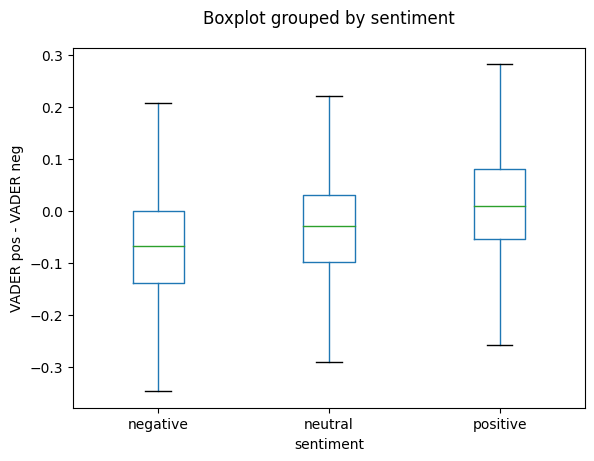

In [176]:
train.boxplot("vader_diff", by="sentiment", grid=False, showfliers=False)
plt.ylabel("VADER pos - VADER neg")
plt.title("")
plt.show()

Text(0, 0.5, 'Train acc.')

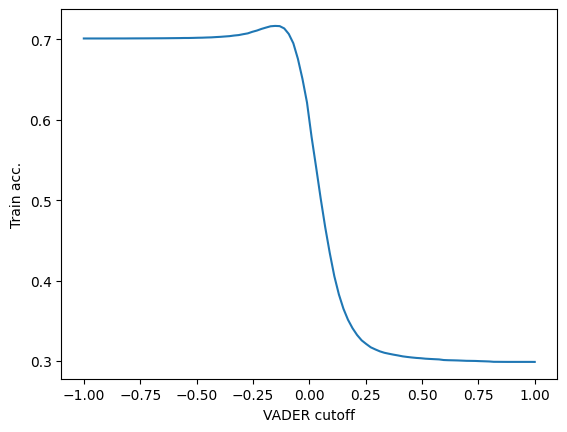

In [177]:
theta = np.linspace(-1.0, 1.0, 100)
diff = [
    accuracy_score((train["vader_diff"] > t), (train["sentiment"] == "positive"))
    for t in theta
]

plt.plot(theta, diff)
plt.xlabel("VADER cutoff")
plt.ylabel("Train acc.")

In [178]:
thresh = theta[np.argmax(diff)]
thresh

-0.1515151515151515

In [179]:
accuracy_score((test["vader_diff"] > thresh), (test["sentiment"] == "positive"))

0.7175803226856372

## Plot sentiment distribution for positive and negative reviews

<ipython-input-180-9527bcd213e5>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(i['compound'], hist = False, label = label)
<ipython-input-180-9527bcd213e5>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(i['compound'], hist = False, label = label)
<ipython-input-180-9527b

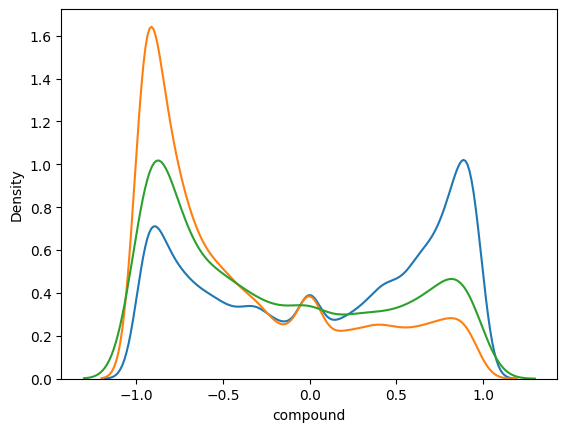

In [180]:
import seaborn as sns

for x in ['positive', 'negative','neutral']:
    i = train[train['sentiment'] == x]
    
    # Draw the density plot
    if x == 'positive':
        label = "Good reviews"
    elif x == 'negative':
        label = "Bad reviews"
    else:
        label ="Neutral Reviews"
    sns.distplot(i['compound'], hist = False, label = label)
    #sns.displot(subset['compound'], label = label, kind="kde")
    #sns.histplot(subset['compound'], label = label, kde=True)